<a href="https://colab.research.google.com/github/ChaseMcClellan/CS422Labs/blob/main/RegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount the Google Drive to access the dataset

This will vary..so please update the paths accordingly!

In [4]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [5]:
!ls '/drive/My Drive/CS422'

Advertising.csv


In [6]:
dataset_path = "/drive/My Drive/CS422"

In [7]:
csv_file = "Advertising.csv"

# Load the Data

In [8]:
df = pd.read_csv(f"{dataset_path}/{csv_file}")

In [9]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## We want to examine any relationship between each advertising channel (TV, Radio, Newspaper) and sales?

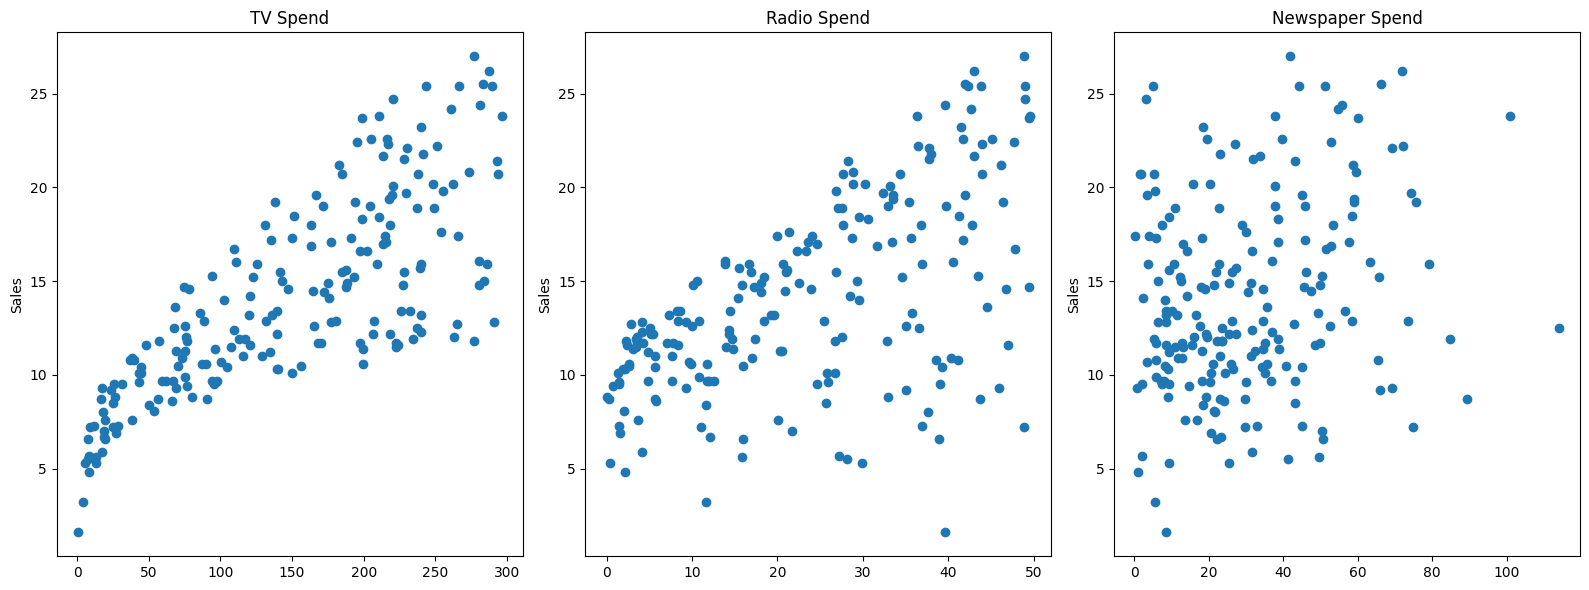

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

The plots reveal the following:

1. **TV Spend vs Sales** : Clear upward trend with a tight cluster of points.

2. **Radio Spend vs Sales** : Moderate upward trend with more spread.

3. **Newspaper Spend vs Sales** : Scattered points with no clear trend.


**Conclusion** :

1. TV advertising appears to have the strongest and most consistent impact on sales.
2. Radio advertising has a moderate impact but is less reliable than TV.
3. Newspaper advertising shows little to no effect on sales and may not be a worthwhile investment.

# Introducting SciKit-Learn

In [ ]:
X = df.drop('sales', axis=1) # axis=1 operation should be applied to columns
y = df['sales']

## Train | Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# random_state:
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
X_train

,TV,radio,newspaper
1,44.5,39.3,45.1
43,206.9,8.4,26.4
102,280.2,10.1,21.4
164,117.2,14.7,5.4
9,199.8,2.6,21.2
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [ ]:
y_train

,sales
1,10.4
43,12.9
102,14.8
164,11.9
9,10.6
...,...
63,14.0
70,18.3
81,12.3
11,17.4


In [ ]:
X_train.shape, y_train.shape

((150, 3), (150,))

In [ ]:
X_test.shape, y_test.shape

((50, 3), (50,))

## Creating our first model `model_1`

### Import a model class from a model family

In [ ]:
from sklearn.linear_model import LinearRegression

### Create an instance of the model with parameters

In [ ]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [ ]:
model_1 = LinearRegression()

### Fit/Train the Model on the training data

In [ ]:
model_1.fit(X_train,y_train)

LinearRegression()

## Calculate Performance on Test Set

In [ ]:
test_predictions = model_1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
test_MSE = mean_squared_error(y_test, test_predictions)
test_RMSE = np.sqrt(test_MSE)

In [ ]:
test_MSE, test_RMSE

(2.1086081578175144, 1.4521047337632071)

In [ ]:
train_predictions = model_1.predict(X_train)

In [ ]:
train_MSE = mean_squared_error(y_train, train_predictions)
train_RMSE = np.sqrt(train_MSE)

In [ ]:
train_MSE, train_RMSE

(3.0181586488172396, 1.7372848496482203)

> Sign of Overfitting? Yes/No

If `train_MSE` is much smaller than `test_MSE`, it suggests that the model is overfitting.

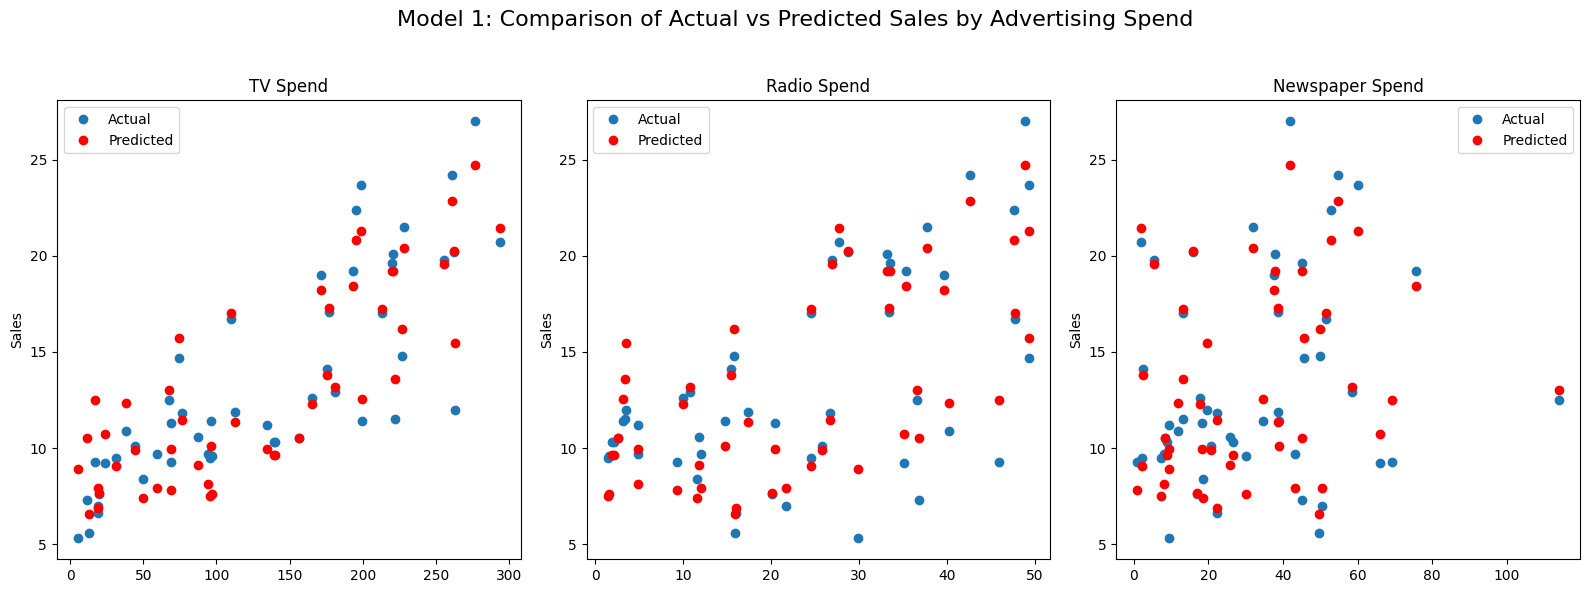

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# Plot for TV Spend
axes[0].plot(X_test['TV'], y_test, 'o', label='Actual')
axes[0].plot(X_test['TV'], test_predictions, 'o', color='red', label='Predicted')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")
axes[0].legend()

# Plot for Radio Spend
axes[1].plot(X_test['radio'], y_test, 'o', label='Actual')
axes[1].plot(X_test['radio'], test_predictions, 'o', color='red', label='Predicted')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")
axes[1].legend()

# Plot for Newspaper Spend
axes[2].plot(X_test['newspaper'], y_test, 'o', label='Actual')
axes[2].plot(X_test['newspaper'], test_predictions, 'o', color='red', label='Predicted')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
axes[2].legend()

# Add a super title for the entire plot
fig.suptitle("Model 1: Comparison of Actual vs Predicted Sales by Advertising Spend", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the super title

# Show the plot
plt.show()

In [ ]:
model_1.coef_

array([0.04495318, 0.19016471, 0.000274  ])

In [ ]:
coeff_df = pd.DataFrame(model_1.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.044953
radio,0.190165
newspaper,0.000274


Interpreting the coefficients:

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units.

* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.
----

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.190 "sales units", in this case 1000s of units.

* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 190 more units sold.
----

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **increse** in sales of  0.0003 "sales units", in this case 1000s of units .

* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell ~0.3 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---


**Note! In this case all our units were the same for each feature (1 unit = $1000 of ad spend). But in other datasets, units may not be the same, such as a housing dataset could try to predict a sale price with both a feature for number of bedrooms and a feature of total area like square footage. In this case it would make more sense to *normalize* the data, in order to clearly compare features and results. We will cover normalization later on.**

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
from sklearn.metrics import r2_score

# Assuming you have already trained your model and made predictions
# y_test: Actual target values
# test_predictions: Predicted target values from the model

# Calculate R²
test_r2 = r2_score(y_test, test_predictions)
print(f"Test R-squared (R²) value: {test_r2:.4f}")

train_r2 = r2_score(y_train, train_predictions)
print(f"Train R-squared (R²) value: {train_r2:.4f}")

Test R-squared (R²) value: 0.9247
Train R-squared (R²) value: 0.8865


## What is Cross-Validation?


In [34]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
mse_scores = []
fold = 1

# Loop through each fold
for train_index, val_index in kf.split(X_train):
    print(f"Fold {fold}")

    # Split the training data into training and validation sets
    X_train_fold, X_val_fold = X_train.values[train_index], X_train.values[val_index]
    y_train_fold, y_val_fold = y_train.values[train_index], y_train.values[val_index]

    # Train a simple linear regression model
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred = model.predict(X_val_fold)

    # Calculate the Mean Squared Error (MSE) for this fold
    mse = mean_squared_error(y_val_fold, y_pred)
    mse_scores.append(mse)

    # Print the results for this fold
    print(f"  Training indices: {train_index}")
    print(f"  Validation indices: {val_index}")
    print(f"  Validation MSE: {mse:.4f}")

    fold += 1

# Calculate the average MSE across all folds
average_mse = np.mean(mse_scores)
print(f"\nAverage MSE across all folds: {average_mse:.4f}")

Fold 1
  Training indices: [  0   1   2   3   4   5   6   7   8  10  11  13  14  17  20  21  22  23
  25  26  27  28  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  52  53  54  57  58  59  60  61  62  63  64  65  67
  68  69  70  71  72  73  74  76  77  79  80  81  82  83  85  86  87  88
  89  90  91  92  93  95  96  99 102 103 106 107 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 129 130 132 133 134
 135 137 138 139 140 143 144 145 146 148 149 150 152 153 154 155 156 157
 158 159]
  Validation indices: [  9  12  15  16  18  19  24  29  30  31  51  55  56  66  75  78  84  94
  97  98 100 101 104 105 108 128 131 136 141 142 147 151]
  Validation MSE: 3.7831
Fold 2
  Training indices: [  0   1   3   5   7   8   9  10  12  13  14  15  16  17  18  19  20  21
  23  24  25  28  29  30  31  33  34  35  37  38  39  40  43  44  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  61  62  63  64  66  68
  70  71  72  73  74  75  77

In [ ]:
X_train

,TV,radio,newspaper
1,44.5,39.3,45.1
43,206.9,8.4,26.4
102,280.2,10.1,21.4
164,117.2,14.7,5.4
9,199.8,2.6,21.2
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


# Extra Credit Excerise

**Gaussian Noise**

In [23]:
import pandas as pd
import numpy as np

#display beffore
print("Before adding noise:")
display(df.head())

np.random.seed(100)#sets a random seed for NumPy number generator (any number arg works)

#we want to add noise, np.rand.normal is the normal noise from numpy lib.
df['TV'] += np.random.normal(0, 1, df['TV'].shape[0]) #0 arg being the mean, 1 being the standard deviation. df['TV'].shape[0] gives us a random number for each row in TVs
df['radio'] += np.random.normal(0, 1, df['radio'].shape[0]) #same concept but with radio
df['newspaper'] += np.random.normal(0, 1, df['newspaper'].shape[0]) #same concept but with newspaper

#display after
print("After adding noise:")
display(df.head())

Before adding noise:


,TV,radio,newspaper,sales
0,233.080285,39.946724,59.633434,22.1
1,43.670414,42.664707,41.503750,10.4
2,21.086131,52.398307,69.331462,9.3
3,160.638179,47.622812,58.781884,18.5
4,179.395080,2.533984,55.699607,12.9


After adding noise:


,TV,radio,newspaper,sales
0,231.330519,40.551148,59.435637,22.1
1,44.013095,41.757677,40.649077,10.4
2,22.239167,52.990331,69.355060,9.3
3,160.385743,47.185748,58.611427,18.5
4,180.376401,2.635760,54.629941,12.9


**Train and Evaluate Models**

Import Required Libraries and Split the Data

In [33]:
#(Chat-GPT o3-mini-high help explanation and some code [reviewed and edited by Chase])
#import needed libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare features and target variable
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Split the data into training and testing sets (80% training, 20% testing)
#X_train -> independent vars for training
#X_test -> independent vars for evaluating performance
#Y_train -> the dependent vars for the training set (sales)
#Y_test -> the dependent vars for testing
#train_test_split method to split the set into subsets
#test_size meaning 20% will go to the test set, 80% will be left for training.
#random_state will give the model random numbers (does not matter the arg given)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=378)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (160, 3)
Testing data size: (40, 3)


Train and Evaluate Each Model

In [35]:
# Create a dictionary to store models and their results (Chat-GPT o3-mini-high code [reviewed and edited by Chase])
#note: Chat-GPT gave me the idea to make a dictionary then run it through a loop (smart move)
models = {
    'Linear Regression': LinearRegression(),#set the regression models
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net Regression': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train) #fits the model to the training data
    y_pred = model.predict(X_test)# get the trained model to make predictions on test data

    mse = mean_squared_error(y_test, y_pred)#method to find the mse
    r2 = r2_score(y_test, y_pred)#method to find the r2

    results[name] = {'MSE': mse, 'R² Score': r2}#record results

    print(f"{name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

# Convert results to DataFrame for easy visualization
results_df = pd.DataFrame(results).T
display(results_df)


Linear Regression:
Mean Squared Error: 5.6227
R² Score: 0.8437

Ridge Regression:
Mean Squared Error: 5.6227
R² Score: 0.8437

Lasso Regression:
Mean Squared Error: 5.6306
R² Score: 0.8435

Elastic Net Regression:
Mean Squared Error: 5.6268
R² Score: 0.8436



,MSE,R² Score
Linear Regression,5.622707,0.843715
Ridge Regression,5.622719,0.843715
Lasso Regression,5.630640,0.843495
Elastic Net Regression,5.626756,0.843602


Visualize the Results

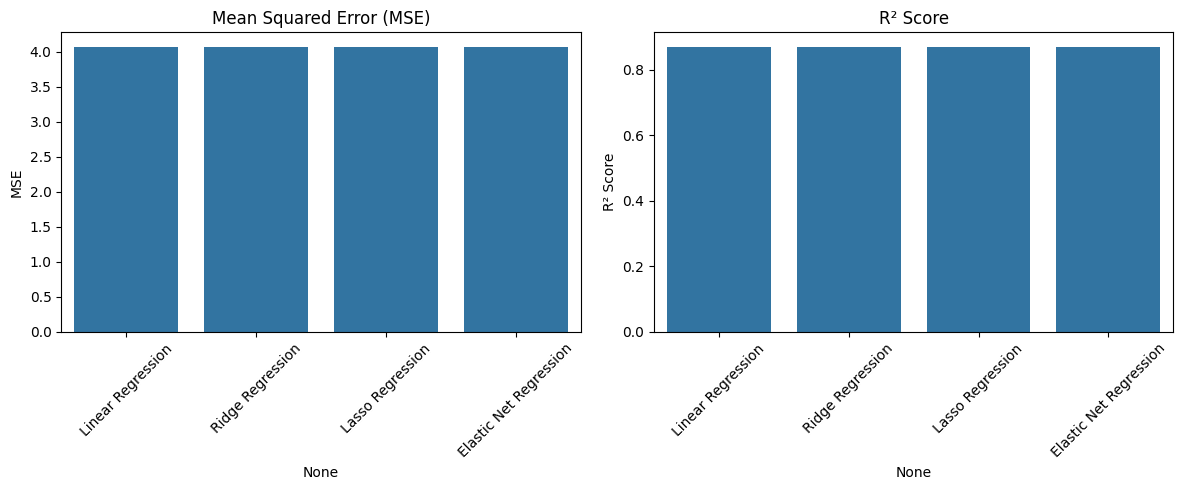

In [19]:
# Visualization of MSE and R^2 Score for all models (Chat-GPT o3-mini-high code [reviewed by Chase])
#uses various sns & plt methods to visualise the models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot MSE
sns.barplot(x=results_df.index, y='MSE', data=results_df, ax=axes[0])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')
axes[0].tick_params(axis='x', rotation=45)

# Plot R2 Score
sns.barplot(x=results_df.index, y='R² Score', data=results_df, ax=axes[1])
axes[1].set_title('R² Score')
axes[1].set_ylabel('R² Score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Report Your Observations**

Gaussian noise:

Gausian noise with a mean of 0 and a standard deviation of 1 was added. We did this to see how the regression models handle the data imperfections and to see how to regularize with noise. The top table shows the first five rows before adding noise. The table after shows the five after applying the noise. As we can see, the change in values are small on the TV and radio.
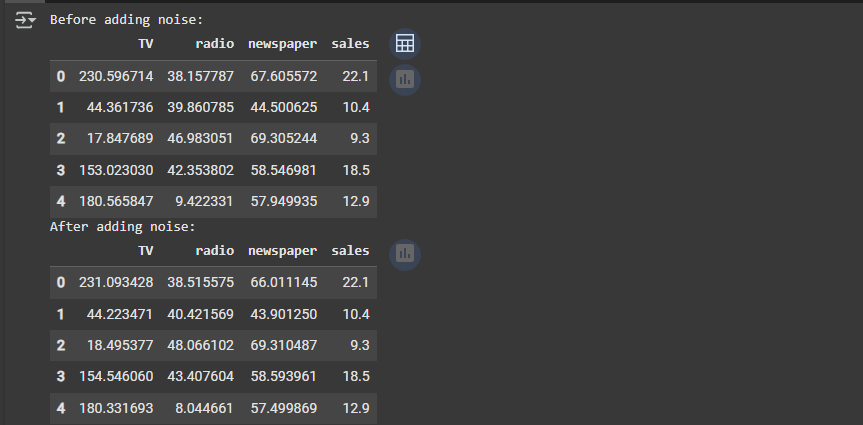

Model Evaluation:
In this table it shows the mean squared error(MSE) and R^2 score. MSE is a method to mesure averaged squared difference between the predicted and actual values in a regression model. This gives us a measure for how much of an error the model made. R^2 is a measurment that just shows how well the model fits into the data. 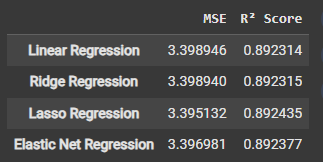

As we can see, lasso regression acheived the lowest MSE and the highest R^2. This showed it preformed the best. On the other end linear regression had the highest mse and the lowest R^2. Ridge and elastic regression performed similarly.

**Visual Comparision**

Left graph shows the MSE. Right graph shows the R^2 score. 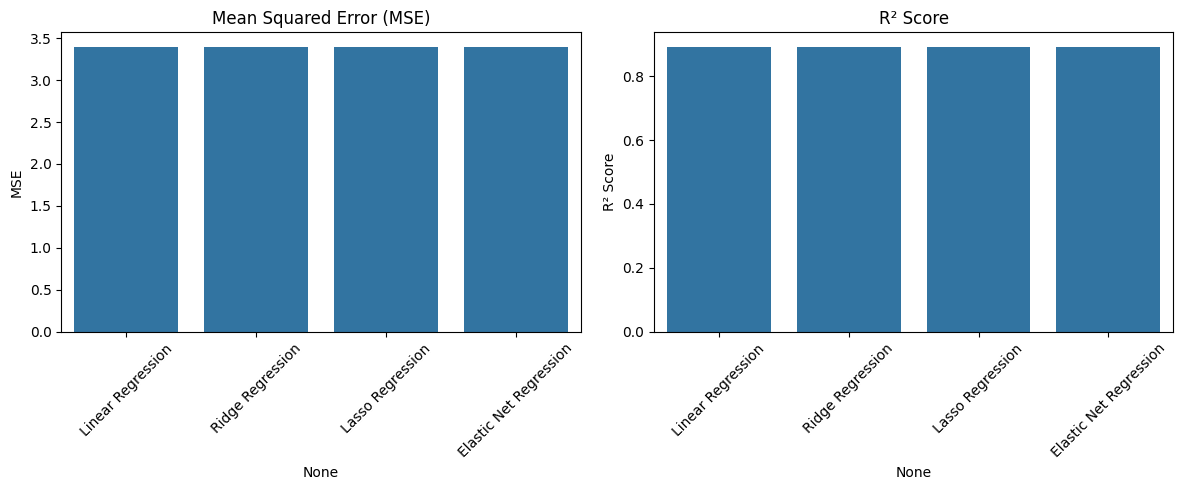
The visual shows there is not too much of a difference between the regression models.
